In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [40]:
data = pd.read_csv('Advertising.csv')
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [55]:
features = data[["TV","Radio","Newspaper"]]
target = data[["Sales"]] 

In [42]:
x_train, x_test, y_train, y_test =  train_test_split(features, target, test_size=0.2, random_state=42)

print('x_train shape  : ', x_train.shape)
print('x_test shape  : ', x_test.shape)
print('y_train shape  : ', y_train.shape)
print('y_test shape  : ', y_test.shape)

x_train shape  :  (160, 3)
x_test shape  :  (40, 3)
y_train shape  :  (160, 1)
y_test shape  :  (40, 1)


In [43]:
print(x_train.mean())
print(x_train.std())
print(x_test.mean())
print(x_train.std())

67.61354166666666
77.2914134135002
64.31333333333333
77.2914134135002


In [44]:
def z_score_normalization(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    data_normalized = (data - mean) / std
    return data_normalized, mean, std

In [45]:
x_train_norm, mean,std=z_score_normalization(x_train)
x_train_norm

array([[-4.04248386e-01, -1.02823707e+00, -3.37675384e-01],
       [ 3.20607716e-01, -9.19827737e-01, -1.16143931e+00],
       [-1.27051084e+00,  2.59123702e-01,  2.54250789e-01],
       [-1.04235941e+00, -6.96233499e-01, -5.74445854e-01],
       [ 8.79103401e-01, -1.38734296e+00, -7.07629243e-01],
       [-1.32873699e+00, -1.29926038e+00, -7.96418169e-01],
       [-9.43731452e-01, -4.65863678e-01,  5.35415722e-01],
       [-3.23140256e-02,  6.94073782e-02, -5.34984109e-01],
       [-5.39713297e-01, -1.16374872e+00,  2.19721762e-01],
       [-8.75998996e-01,  3.13328366e-01, -6.87898371e-01],
       [-8.53421511e-01,  1.62101588e+00,  2.24654481e-01],
       [ 2.18414888e-01, -1.06889056e+00, -8.45745350e-01],
       [-1.67928215e+00,  1.76330312e+00,  2.22240532e+00],
       [-1.68997675e+00,  1.08574483e+00,  1.01882210e+00],
       [-8.74810708e-01, -1.49575229e+00, -7.47090988e-01],
       [-2.45017701e-01, -1.16374872e+00,  6.68075010e-02],
       [-9.10459368e-01, -3.98107848e-01

In [46]:
print(x_train_norm.mean())
print(x_train_norm.std())
print(mean)
print(std)

9.251858538542972e-17
1.0
[150.019375  22.875625  29.945625]
[84.15463408 14.75887761 20.27279842]


In [47]:
X_train_norm_1 = np.hstack((x_train_norm, np.ones((x_train.shape[0], 1))))
X_train_norm_1

array([[-4.04248386e-01, -1.02823707e+00, -3.37675384e-01,
         1.00000000e+00],
       [ 3.20607716e-01, -9.19827737e-01, -1.16143931e+00,
         1.00000000e+00],
       [-1.27051084e+00,  2.59123702e-01,  2.54250789e-01,
         1.00000000e+00],
       [-1.04235941e+00, -6.96233499e-01, -5.74445854e-01,
         1.00000000e+00],
       [ 8.79103401e-01, -1.38734296e+00, -7.07629243e-01,
         1.00000000e+00],
       [-1.32873699e+00, -1.29926038e+00, -7.96418169e-01,
         1.00000000e+00],
       [-9.43731452e-01, -4.65863678e-01,  5.35415722e-01,
         1.00000000e+00],
       [-3.23140256e-02,  6.94073782e-02, -5.34984109e-01,
         1.00000000e+00],
       [-5.39713297e-01, -1.16374872e+00,  2.19721762e-01,
         1.00000000e+00],
       [-8.75998996e-01,  3.13328366e-01, -6.87898371e-01,
         1.00000000e+00],
       [-8.53421511e-01,  1.62101588e+00,  2.24654481e-01,
         1.00000000e+00],
       [ 2.18414888e-01, -1.06889056e+00, -8.45745350e-01,
      

In [48]:
x_test_norm, mean_test,std_test= z_score_normalization(x_test)
X_test_norm_1 = np.hstack((x_test_norm, np.ones((x_test.shape[0], 1))))
X_test_norm_1

array([[ 0.31169191,  0.45489058,  0.74818001,  1.        ],
       [ 0.66693106,  1.5346898 ,  0.74818001,  1.        ],
       [ 1.74592846,  0.23356527,  0.38371819,  1.        ],
       [-1.36601071,  0.81035243,  0.45886496,  1.        ],
       [ 0.94249039,  1.62187856, -1.11921718,  1.        ],
       [-0.66438573,  0.68292271,  0.74066534,  1.        ],
       [ 0.90375715,  1.27983036, -0.21745596,  1.        ],
       [-0.94215839, -0.88647493, -0.54810174,  1.        ],
       [ 0.96573034, -1.43643478, -0.74724068,  1.        ],
       [ 0.44227827, -0.15543073, -0.05589041,  1.        ],
       [-1.14689123, -0.01458735, -1.15679057,  1.        ],
       [-0.87354523, -1.28217775, -0.1235225 ,  1.        ],
       [ 1.09963668, -1.43643478,  1.94677097,  1.        ],
       [-1.43573054,  0.34087451, -0.8862622 ,  1.        ],
       [ 0.04830588, -1.52362354, -0.23999999,  1.        ],
       [ 0.38805173, -1.14133437,  0.08313111,  1.        ],
       [-1.41470392,  0.

In [49]:
np.random.seed(0)
y_test = y_test.values
theta = np.random.randn(X_train_norm_1.shape[1], 1)
theta

array([[1.76405235],
       [0.40015721],
       [0.97873798],
       [2.2408932 ]])

In [56]:
def model(X, theta): # définir le modèle
    return X.dot(theta)

def cost_function(X, y, theta): #définir la fonction coût
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

cost_function(X_train_norm_1, y_train ,theta)

C:\Users\Mohammed Tlemsani\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Sales    91.725225
dtype: float64

In [57]:
# définir la fonction de gradient
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)
# Définir la descente de gradient
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

In [77]:
theta_final, cost_h = gradient_descent(X_train_norm_1, y_train, theta, learning_rate=1, n_iterations=1000)

theta_final

C:\Users\Mohammed Tlemsani\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Mohammed Tlemsani\AppData\Local\Temp\ipykernel_19440\2100898011.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]


array([[ 4.58720774],
       [ 1.48984025],
       [ 0.08791597],
       [15.330625  ]])

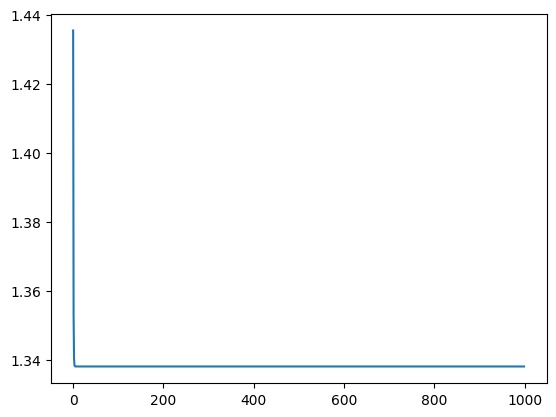

In [78]:
plt.plot(range(1000), cost_h)
plt.show()

In [79]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

coef_determination(y_test, model(X_test_norm_1,theta_final))

0.8764854501314348

In [80]:
predictions=model(X_test_norm_1, theta_final)
predictions

array([[17.50391182],
       [20.74219592],
       [23.72127142],
       [10.31208735],
       [21.97196713],
       [13.36551168],
       [21.36397174],
       [ 9.6398558 ],
       [17.55487794],
       [17.12296667],
       [ 9.94616347],
       [ 9.40239196],
       [18.40598079],
       [ 9.17456273],
       [13.26115862],
       [15.41760157],
       [ 9.19686397],
       [18.28796836],
       [11.84009908],
       [20.71751213],
       [21.00485828],
       [13.35729329],
       [11.87693778],
       [22.50462077],
       [10.31676426],
       [ 8.86820137],
       [21.12832019],
       [14.43585209],
       [11.57307189],
       [ 9.03295683],
       [16.35440939],
       [11.50351006],
       [21.1131925 ],
       [11.40153401],
       [21.64259562],
       [21.41875821],
       [13.05805662],
       [22.86104093],
       [13.31807447],
       [ 7.50603126]])